# ***Reading CSVs and loading packages***

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import time as tm
import matplotlib.pyplot as plt
from io import StringIO
import seaborn as sns

In [2]:
EVQ1 = pd.read_csv('CityEV 2022_Q1 data.csv')
EVQ2 = pd.read_csv('CityEV 2021 Q2 data.csv')
EVQ3 = pd.read_csv('CityEV 2021_Q3 data.csv')
EVQ4 = pd.read_csv('CityEV 2021_Q4 data.csv')

Charge = pd.read_csv('Charge Transactions.csv')
City = pd.read_csv('CityEV Data.csv')

In [3]:
EVlist = [EVQ1, EVQ2, EVQ3, EVQ4, Charge, City]
for i in EVlist:
    print(len(i))

44225
44225
44225
44225
2415
44225


In [4]:
EVQ1.columns

Index(['Charging event', 'Chargepoint ID', 'Borough', 'Operator',
       'Plug in Date and Time', 'Unplug Date and Time',
       'Charge start Date and Time', 'Charge end Date and Time', 'Total kWh'],
      dtype='object')

In [5]:
EVQ1NA = EVQ1.dropna(subset=['Charging event', 'Chargepoint ID', 'Borough', 'Operator', 'Plug in Date and Time', 'Unplug Date and Time', 'Charge start Date and Time', 'Charge end Date and Time', 'Total kWh'])
EVQ2NA = EVQ2.dropna(subset=['Charging event', 'Chargepoint ID', 'Borough', 'Operator', 'Plug in Date and Time', 'Unplug Date and Time', 'Charge start Date and Time', 'Charge end Date and Time', 'Total kWh'])
EVQ3NA = EVQ3.dropna(subset=['Charging event', 'Chargepoint ID', 'Borough', 'Operator', 'Plug in Date and Time', 'Unplug Date and Time', 'Charge start Date and Time', 'Charge end Date and Time', 'Total kWh'])
EVQ4NA = EVQ4.dropna(subset=['Charging event', 'Chargepoint ID', 'Borough', 'Operator', 'Plug in Date and Time', 'Unplug Date and Time', 'Charge start Date and Time', 'Charge end Date and Time', 'Total kWh'])
ChargeNA = Charge.dropna(subset=[])
CityNA = City.dropna(subset=['Charging event', 'Chargepoint ID', 'Borough', 'Operator', 'Plug in Date and Time', 'Unplug Date and Time', 'Charge start Date and Time', 'Charge end Date and Time', 'Total kWh'])

In [6]:
EVlistNA = [EVQ1NA, EVQ2NA, EVQ3NA, EVQ4NA, ChargeNA, CityNA]
for i in EVlistNA:
    print(len(i))

1891
856
925
1792
2415
856


### Conclusion: the 'City' dataset contains the exact same information as the EV Quarter 2 dataset and is therefore dropped

### 'Charge Transactions' dataset contains structurally differnent data than the main datasets and is therefore also omitted

# ***Datetime transformations to the time columns***

In [7]:
# First drop misleading instance
EVQ4NA = EVQ4NA[EVQ4NA['Plug in Date and Time'] != '00/00/2000 00:00:00']

In [8]:
# Plug in Date and Time transformation to datetime data type and rounded to 1min
EVQ1NA['Plug in Date and Time'] = pd.to_datetime(EVQ1NA['Plug in Date and Time'], format='%d/%m/%Y %H:%M:%S')
EVQ1NA['Plug in Date and Time'] = EVQ1NA['Plug in Date and Time'].dt.round('1min')

EVQ2NA['Plug in Date and Time'] = pd.to_datetime(EVQ2NA['Plug in Date and Time'], format='%d/%m/%Y %H:%M')
# EVQ2NA does not need to be rounded to 1min as it already does not contain information on the seconds
7
EVQ3NA['Plug in Date and Time'] = pd.to_datetime(EVQ3NA['Plug in Date and Time'], format='%d/%m/%Y %H:%M:%S')
EVQ3NA['Plug in Date and Time'] = EVQ3NA['Plug in Date and Time'].dt.round('1min')

EVQ4NA['Plug in Date and Time'] = pd.to_datetime(EVQ4NA['Plug in Date and Time'], format='%d/%m/%Y %H:%M:%S')
EVQ4NA['Plug in Date and Time'] = EVQ4NA['Plug in Date and Time'].dt.round('1min')

# Charge start Date and Time transformation to datetime data type and rounded to 1min
EVQ1NA['Charge start Date and Time'] = pd.to_datetime(EVQ1NA['Charge start Date and Time'], format='%d/%m/%Y %H:%M:%S')
EVQ1NA['Charge start Date and Time'] = EVQ1NA['Charge start Date and Time'].dt.round('1min')

EVQ2NA['Charge start Date and Time'] = pd.to_datetime(EVQ2NA['Charge start Date and Time'], format='%d/%m/%Y %H:%M')

EVQ3NA['Charge start Date and Time'] = pd.to_datetime(EVQ3NA['Charge start Date and Time'], format='%d/%m/%Y %H:%M:%S')
EVQ3NA['Charge start Date and Time'] = EVQ3NA['Charge start Date and Time'].dt.round('1min')

EVQ4NA['Charge start Date and Time'] = pd.to_datetime(EVQ4NA['Charge start Date and Time'], format='%d/%m/%Y %H:%M:%S')
EVQ4NA['Charge start Date and Time'] = EVQ4NA['Charge start Date and Time'].dt.round('1min')

# Unplug Date and Time transformation to datetime data type and rounded to 1min
EVQ1NA['Unplug Date and Time'] = pd.to_datetime(EVQ1NA['Unplug Date and Time'], format='%d/%m/%Y %H:%M:%S')
EVQ1NA['Unplug Date and Time'] = EVQ1NA['Unplug Date and Time'].dt.round('1min')

EVQ2NA['Unplug Date and Time'] = pd.to_datetime(EVQ2NA['Unplug Date and Time'], format='%d/%m/%Y %H:%M')

EVQ3NA['Unplug Date and Time'] = pd.to_datetime(EVQ3NA['Unplug Date and Time'], format='%d/%m/%Y %H:%M:%S')
EVQ3NA['Unplug Date and Time'] = EVQ3NA['Unplug Date and Time'].dt.round('1min')

EVQ4NA['Unplug Date and Time'] = pd.to_datetime(EVQ4NA['Unplug Date and Time'], format='%d/%m/%Y %H:%M:%S')
EVQ4NA['Unplug Date and Time'] = EVQ4NA['Unplug Date and Time'].dt.round('1min')

# Charge end Date and Time transformation to datetime data type and rounded to 1min
EVQ1NA['Charge end Date and Time'] = pd.to_datetime(EVQ1NA['Charge end Date and Time'], format='%d/%m/%Y %H:%M:%S')
EVQ1NA['Charge end Date and Time'] = EVQ1NA['Charge end Date and Time'].dt.round('1min')

EVQ2NA['Charge end Date and Time'] = pd.to_datetime(EVQ2NA['Charge end Date and Time'], format='%d/%m/%Y %H:%M')

EVQ3NA['Charge end Date and Time'] = pd.to_datetime(EVQ3NA['Charge end Date and Time'], format='%d/%m/%Y %H:%M:%S')
EVQ3NA['Charge end Date and Time'] = EVQ3NA['Charge end Date and Time'].dt.round('1min')

EVQ4NA['Charge end Date and Time'] = pd.to_datetime(EVQ4NA['Charge end Date and Time'], format='%d/%m/%Y %H:%M:%S')
EVQ4NA['Charge end Date and Time'] = EVQ4NA['Charge end Date and Time'].dt.round('1min')

<ipython-input-8-222826a759d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EVQ1NA['Plug in Date and Time'] = pd.to_datetime(EVQ1NA['Plug in Date and Time'], format='%d/%m/%Y %H:%M:%S')
<ipython-input-8-222826a759d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EVQ1NA['Plug in Date and Time'] = EVQ1NA['Plug in Date and Time'].dt.round('1min')
<ipython-input-8-222826a759d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

# ***Merge all 4 remaining datasets together, ranging from 31/03/2021 to 01/04/2022***

In [17]:
append1 = pd.concat([EVQ2NA,EVQ3NA])
append2 = pd.concat([append1,EVQ4NA])
df_append = pd.concat([append2,EVQ1NA])


## ***Check for duplicate instances***

In [10]:
duplicates1 = df_append.duplicated(subset=['Plug in Date and Time','Unplug Date and Time', 'Total kWh'], keep=False)
duplicates1.value_counts()


False    5123
True      340
dtype: int64

In [11]:
duplicates = df_append[df_append.duplicated(subset=['Plug in Date and Time','Unplug Date and Time', 'Total kWh'], keep=False)]
pd.set_option('display.max_rows', 10)
# Display the duplicates
duplicates

,Charging event,Chargepoint ID,Borough,Operator,Plug in Date and Time,Unplug Date and Time,Charge start Date and Time,Charge end Date and Time,Total kWh
14,38598.0,6101.0,Barnet,CityEV,2021-04-02 08:52:00,2021-04-02 14:59:00,2021-04-02 08:52:00,2021-04-02 13:57:00,16.693
15,38599.0,6101.0,Barnet,CityEV,2021-04-02 08:52:00,2021-04-02 14:59:00,2021-04-02 08:52:00,2021-04-02 13:57:00,16.693
16,38601.0,6101.0,Barnet,CityEV,2021-04-02 08:52:00,2021-04-02 14:59:00,2021-04-02 08:52:00,2021-04-02 13:57:00,16.693
17,38602.0,6101.0,Barnet,CityEV,2021-04-02 08:52:00,2021-04-02 14:59:00,2021-04-02 08:52:00,2021-04-02 13:57:00,16.693
26,38688.0,6104.0,Barnet,CityEV,2021-04-03 14:23:00,2021-04-03 18:54:00,2021-04-03 14:23:00,2021-04-03 18:40:00,12.821
...,...,...,...,...,...,...,...,...,...
4,84101.0,6170.0,LB Barnet,CityEV,2021-12-31 18:18:00,2022-01-01 08:18:00,2021-12-31 18:18:00,2022-01-01 02:58:00,28.466
5,84124.0,6103.0,LB Barnet,CityEV,2021-12-31 15:55:00,2022-01-01 11:00:00,2021-12-31 15:55:00,2022-01-01 10:59:00,62.123
6,84142.0,6129.0,LB Barnet,CityEV,2021-12-31 13:51:00,2022-01-01 12:23:00,2021-12-31 13:51:00,2022-01-01 12:23:00,69.294
7,84147.0,6121.0,LB Barnet,CityEV,2022-01-01 09:28:00,2022-01-01 12:41:00,2022-01-01 09:28:00,2022-01-01 12:28:00,9.879


In [12]:
# Drop the previously identified duplicates
df_append = df_append.drop_duplicates(subset=['Plug in Date and Time','Unplug Date and Time', 'Total kWh'], keep='first')

### **These duplicates were not identified by the previous approach. The reason is that some of these duplicates lack the 'seconds' dimension and therefore only have the same minutes, hours, etc.**

In [13]:
# Identifing duplicates by 'Charging event'
duplicates = df_append[df_append.duplicated(subset=['Charging event'], keep=False)]
pd.set_option('display.max_rows', 10)
# Display the duplicates
duplicates

,Charging event,Chargepoint ID,Borough,Operator,Plug in Date and Time,Unplug Date and Time,Charge start Date and Time,Charge end Date and Time,Total kWh
855,49183.0,6132.0,Barnet,CityEV,2021-06-30 20:25:00,2021-07-01 07:03:00,2021-06-30 20:25:00,2021-07-01 01:11:00,13.978
859,49197.0,6118.0,Barnet,CityEV,2021-06-30 17:03:00,2021-07-01 05:41:00,2021-06-30 17:03:00,2021-07-01 00:06:00,24.785
0,49183.0,6132.0,Barnet,CityEV,2021-06-30 20:26:00,2021-07-01 07:03:00,2021-06-30 20:26:00,2021-07-01 01:12:00,13.978
2,49197.0,6118.0,Barnet,CityEV,2021-06-30 17:04:00,2021-07-01 05:42:00,2021-06-30 17:04:00,2021-07-01 00:06:00,24.785


In [14]:
# Drop these additional duplicates
df_append = df_append.drop_duplicates(subset=['Charging event'], keep='first')

In [15]:
len(df_append)

5265

In [16]:
#Reset the index of df_append
df_append.reset_index(drop = True, inplace = True)

# ***Dropping unnecessary columns and renaming columns***

In [18]:
df_append.drop(columns = ['Charging event','Borough','Operator'], inplace = True)

In [19]:
df_append.rename(columns = {'Chargepoint ID':'Chargepoint','Plug in Date and Time':'PlugInDate','Unplug Date and Time': 'UnplugDate','Charge start Date and Time':'ChargeStart','Charge end Date and Time':'ChargeEnd'}, inplace = True)

In [20]:
df_append.dtypes

Chargepoint           float64
PlugInDate     datetime64[ns]
UnplugDate     datetime64[ns]
ChargeStart    datetime64[ns]
ChargeEnd      datetime64[ns]
Total kWh             float64
dtype: object

# ***Delete troublesome instances***

### **Instances where delta between plugin time and start of charging is too large**

In [21]:
#Calculate the time difference (delta) between the Plugin time and the beginning of charging
df_append['PlugChargeStart'] = df_append['ChargeStart'] - df_append['PlugInDate']
df_append['PlugChargeStartMin'] = df_append['PlugChargeStart'].dt.total_seconds()/60

In [22]:
# Optimally this delta should be near zero, at most 2 [minutes]
#Each instance that has a delta > 2 means that something must have went wrong with the charging, these instances are therefore deleted
PlugChargeMinutes2 = df_append[df_append['PlugChargeStartMin']>2]
pd.set_option('display.max_rows', 10)
PlugChargeMinutes2

,Chargepoint,PlugInDate,UnplugDate,ChargeStart,ChargeEnd,Total kWh,PlugChargeStart,PlugChargeStartMin
112,6116.0,2021-04-13 16:30:00,2021-04-13 19:48:00,2021-04-13 18:38:00,2021-04-13 19:48:00,4.553,0 days 02:08:00,128.0
554,6137.0,2021-10-30 19:01:00,2021-10-31 11:31:00,2021-10-31 00:30:00,2021-10-31 07:31:00,27.552,0 days 05:29:00,329.0
1255,6137.0,2021-12-04 10:32:00,2021-12-04 18:05:00,2021-12-04 12:28:00,2021-12-04 18:05:00,21.700,0 days 01:56:00,116.0
1394,6137.0,2021-12-10 11:06:00,2021-12-11 10:10:00,2021-12-11 01:30:00,2021-12-11 10:09:00,31.803,0 days 14:24:00,864.0
1754,6100.0,2021-12-29 16:35:00,2021-12-29 16:48:00,2021-12-29 16:40:00,2021-12-29 16:48:00,0.474,0 days 00:05:00,5.0
1308,6119.0,2022-03-05 11:37:00,2022-03-05 13:32:00,2022-03-05 13:31:00,2022-03-05 13:32:00,0.007,0 days 01:54:00,114.0


In [23]:
# Remove the previous intances and the column
df_append = df_append[df_append['PlugChargeStartMin']<3]
df_append.drop(columns=['PlugChargeStart'],inplace = True)

<ipython-input-23-3f51f5af3c29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_append.drop(columns=['PlugChargeStart'],inplace = True)


### **Instances where charging time is too short**


Delta between 'ChargeStart' and 'ChargeEnd' is too short

In [24]:
df_append['ChargeDelta'] = df_append['ChargeEnd'] - df_append['ChargeStart']
df_append['DeltaChargeHours'] = df_append['ChargeDelta'].dt.total_seconds()/3600

In [25]:
# All instances where the actual charging time was less than 5 minutes
# These instances indicate that something went wrong with the charging process and are therefore dropped
df_append[df_append['DeltaChargeHours']<0.08333]

,Chargepoint,PlugInDate,UnplugDate,ChargeStart,ChargeEnd,Total kWh,PlugChargeStartMin,ChargeDelta,DeltaChargeHours
4,6189.0,2021-04-01 14:37:00,2021-04-01 14:37:00,2021-04-01 14:37:00,2021-04-01 14:37:00,0.015,0.0,0 days 00:00:00,0.000000
49,6107.0,2021-04-06 17:06:00,2021-04-06 17:06:00,2021-04-06 17:06:00,2021-04-06 17:06:00,0.000,0.0,0 days 00:00:00,0.000000
50,6107.0,2021-04-06 17:06:00,2021-04-06 17:07:00,2021-04-06 17:06:00,2021-04-06 17:06:00,0.000,0.0,0 days 00:00:00,0.000000
58,6115.0,2021-04-07 17:23:00,2021-04-07 17:24:00,2021-04-07 17:23:00,2021-04-07 17:24:00,0.000,0.0,0 days 00:01:00,0.016667
79,6189.0,2021-04-09 19:22:00,2021-04-09 19:22:00,2021-04-09 19:22:00,2021-04-09 19:22:00,0.000,0.0,0 days 00:00:00,0.000000
...,...,...,...,...,...,...,...,...,...
1802,6154.0,2022-03-28 09:20:00,2022-03-28 09:23:00,2022-03-28 09:20:00,2022-03-28 09:20:00,0.017,0.0,0 days 00:00:00,0.000000
1817,6172.0,2022-03-28 17:46:00,2022-03-28 17:48:00,2022-03-28 17:46:00,2022-03-28 17:48:00,0.068,0.0,0 days 00:02:00,0.033333
1829,6185.0,2022-03-29 07:41:00,2022-03-29 10:48:00,2022-03-29 07:41:00,2022-03-29 07:41:00,10.747,0.0,0 days 00:00:00,0.000000
1838,6189.0,2022-03-29 12:32:00,2022-03-29 12:54:00,2022-03-29 12:32:00,2022-03-29 12:32:00,1.234,0.0,0 days 00:00:00,0.000000


In [26]:
pd.set_option('display.max_rows', 10)
df_append[(df_append['DeltaChargeHours']<0.08333) & (df_append['Total kWh']>1)]
#These are the instances with less than 5 minute charging time but still more than 1 kWh total energy drawn
#The issue here is that the ChargEnd time is incorrect (equal to ChargeStart) eventhough it was a regular charging session

,Chargepoint,PlugInDate,UnplugDate,ChargeStart,ChargeEnd,Total kWh,PlugChargeStartMin,ChargeDelta,DeltaChargeHours
373,6189.0,2021-05-10 16:48:00,2021-05-10 16:48:00,2021-05-10 16:48:00,2021-05-10 16:48:00,2.131,0.0,0 days,0.0
806,6132.0,2021-06-26 10:25:00,2021-06-26 10:25:00,2021-06-26 10:25:00,2021-06-26 10:25:00,30.218,0.0,0 days,0.0
555,6169.0,2021-08-30 14:45:00,2021-08-30 14:45:00,2021-08-30 14:45:00,2021-08-30 14:45:00,8.388,0.0,0 days,0.0
293,6168.0,2021-10-14 07:39:00,2021-10-14 07:39:00,2021-10-14 07:39:00,2021-10-14 07:39:00,2.059,0.0,0 days,0.0
440,6193.0,2021-10-22 11:30:00,2021-10-22 19:43:00,2021-10-22 11:30:00,2021-10-22 11:30:00,15.706,0.0,0 days,0.0
...,...,...,...,...,...,...,...,...,...
1674,6123.0,2022-03-22 08:42:00,2022-03-22 11:30:00,2022-03-22 08:42:00,2022-03-22 08:42:00,10.024,0.0,0 days,0.0
1684,6184.0,2022-03-22 17:16:00,2022-03-23 05:45:00,2022-03-22 17:16:00,2022-03-22 17:16:00,42.836,0.0,0 days,0.0
1829,6185.0,2022-03-29 07:41:00,2022-03-29 10:48:00,2022-03-29 07:41:00,2022-03-29 07:41:00,10.747,0.0,0 days,0.0
1838,6189.0,2022-03-29 12:32:00,2022-03-29 12:54:00,2022-03-29 12:32:00,2022-03-29 12:32:00,1.234,0.0,0 days,0.0


In [27]:
# Loop the previously outlined instances
for index, row in df_append[(df_append['DeltaChargeHours'] < 0.08333) & (df_append['Total kWh'] > 1)].iterrows():
    if row['PlugInDate'] != row['UnplugDate']:
        df_append.at[index, 'ChargeEnd'] = row['UnplugDate']
    else:
        df_append.drop(index, inplace=True)

# Resetting index after dropping rows
df_append.reset_index(drop=True, inplace=True)

In [28]:
# Recalculate the delta between ChargeStart and ChargeEnd with new ChargeEnd values
df_append['ChargeDelta'] = df_append['ChargeEnd'] - df_append['ChargeStart']
df_append['DeltaChargeHours'] = df_append['ChargeDelta'].dt.total_seconds() / 3600

# Executing the code below shows that there are no more instances with < 5min charging and >1 Total kWh
df_append[(df_append['DeltaChargeHours'] < 0.08333) & (df_append['Total kWh'] > 1)]

,Chargepoint,PlugInDate,UnplugDate,ChargeStart,ChargeEnd,Total kWh,PlugChargeStartMin,ChargeDelta,DeltaChargeHours
3983,6130.0,2022-01-23 20:48:00,2022-01-24 11:06:00,2022-01-23 20:48:00,2021-10-22 19:43:00,12.192,0.0,-94 days +22:55:00,-2233.083333
3984,6170.0,2022-01-23 16:25:00,2022-01-24 05:56:00,2022-01-23 16:25:00,2021-10-22 19:43:00,19.838,0.0,-93 days +03:18:00,-2228.700000
4545,6168.0,2022-02-19 22:46:00,2022-02-20 08:58:00,2022-02-19 22:46:00,2021-11-24 07:40:00,11.867,0.0,-88 days +08:54:00,-2103.100000
4607,6118.0,2022-02-22 12:20:00,2022-02-22 22:39:00,2022-02-22 12:20:00,2021-11-27 08:06:00,26.166,0.0,-88 days +19:46:00,-2092.233333
4662,6139.0,2022-02-25 06:48:00,2022-02-25 12:42:00,2022-02-25 06:48:00,2021-11-30 07:39:00,17.148,0.0,-87 days +00:51:00,-2087.150000
4910,6172.0,2022-03-08 12:12:00,2022-03-08 14:57:00,2022-03-08 12:12:00,2021-12-11 08:24:00,4.973,0.0,-88 days +20:12:00,-2091.800000


In [29]:
# Remove the previous intances and the column
df_append = df_append[df_append['DeltaChargeHours']>0.08333]
df_append.drop(columns=['ChargeDelta'],inplace = True)

<ipython-input-29-7673771ca5b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_append.drop(columns=['ChargeDelta'],inplace = True)


### **Instances where charging time is too long**

In [30]:
#Detecting outliers (= 3*std)
print('Std:',np.std(df_append['DeltaChargeHours']),'Mean:',df_append['DeltaChargeHours'].mean())
print('\n Outlier:',6.215474779402082 + 3*5.237669969863718)
#If the charging took longer than approximately 22 hours the session was an outlier sinc 99.7% lie within 3 standard deviations

Std: 215.16114171708395 Mean: 21.198384532213954

 Outlier: 21.928484688993237


In [31]:
df_append = df_append[df_append['DeltaChargeHours']<22]

## **Plot the frequency of time passed between end of charging and unpluging**

The difference (delta) between 'UnplugDate' and 'ChargeEnd'

In [32]:
df_append['UnplugChargeEnd'] = df_append['UnplugDate'] - df_append['ChargeEnd']
df_append['UnplugChargEndHours'] = df_append['UnplugChargeEnd'].dt.total_seconds()/3600

In [33]:
test = df_append[df_append['UnplugChargEndHours']>0.08333]
test['DeltaChargeHours'].mean()

6.201396761133603

In [34]:
list15 = list(range(0, 21))
list16 = list(range(1, 22))

for i, j in zip(list15, list16):
    print(len(df_append[(df_append['UnplugChargEndHours'] > i) & (df_append['UnplugChargEndHours'] < j)]))

1181
300
238
154
166
156
133
126
120
77
53
62
50
37
20
20
16
7
6
9
2


In [35]:
len(df_append[(df_append['DeltaChargeHours'] > 16)])

154

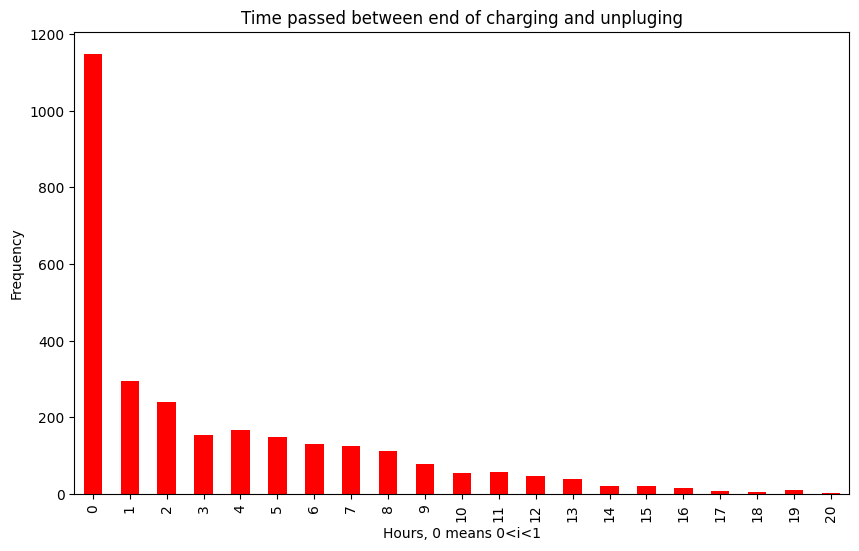

In [36]:
numbers_list = [1148, 294, 239, 153, 166, 148, 130, 124, 113, 77, 54, 58, 47, 38, 20, 20, 15, 8, 6, 10, 2]
numbers_series = pd.Series(numbers_list)

plt.figure(figsize=(10, 6))
numbers_series.plot(kind='bar', color='red')
plt.xlabel('Hours, 0 means 0<i<1')
plt.ylabel('Frequency')
plt.title('Time passed between end of charging and unpluging')
plt.show()

In [37]:
df_append[df_append['DeltaChargeHours']<10]

,Chargepoint,PlugInDate,UnplugDate,ChargeStart,ChargeEnd,Total kWh,PlugChargeStartMin,DeltaChargeHours,UnplugChargeEnd,UnplugChargEndHours
1,6104.0,2021-03-31 18:14:00,2021-04-01 05:31:00,2021-03-31 18:14:00,2021-03-31 23:36:00,17.832,0.0,5.366667,0 days 05:55:00,5.916667
2,6169.0,2021-04-01 07:49:00,2021-04-01 17:14:00,2021-04-01 07:49:00,2021-04-01 12:59:00,14.417,0.0,5.166667,0 days 04:15:00,4.250000
3,6188.0,2021-04-01 10:32:00,2021-04-01 13:36:00,2021-04-01 10:32:00,2021-04-01 13:36:00,8.916,0.0,3.066667,0 days 00:00:00,0.000000
5,6118.0,2021-04-01 16:07:00,2021-04-01 19:26:00,2021-04-01 16:08:00,2021-04-01 19:16:00,8.383,1.0,3.133333,0 days 00:10:00,0.166667
8,6109.0,2021-04-01 21:39:00,2021-04-02 09:16:00,2021-04-01 21:39:00,2021-04-02 00:49:00,7.944,0.0,3.166667,0 days 08:27:00,8.450000
...,...,...,...,...,...,...,...,...,...,...
5428,6186.0,2022-03-31 20:17:00,2022-03-31 22:10:00,2022-03-31 20:18:00,2022-03-31 22:10:00,6.604,1.0,1.866667,0 days 00:00:00,0.000000
5430,6133.0,2022-03-31 19:02:00,2022-04-01 07:04:00,2022-03-31 19:02:00,2022-04-01 04:27:00,32.327,0.0,9.416667,0 days 02:37:00,2.616667
5431,6113.0,2022-03-31 23:26:00,2022-04-01 07:18:00,2022-03-31 23:26:00,2022-04-01 07:18:00,28.017,0.0,7.866667,0 days 00:00:00,0.000000
5433,6118.0,2022-03-31 18:49:00,2022-04-01 10:04:00,2022-03-31 18:49:00,2022-04-01 00:00:00,17.169,0.0,5.183333,0 days 10:04:00,10.066667


In [38]:
df_append['UnplugDelta'] = df_append['UnplugDate'] - df_append['ChargeEnd']
df_append['UnplugDeltaHours'] = df_append['UnplugDelta'].dt.total_seconds()/3600

In [39]:
df_append[df_append['UnplugDeltaHours']>1]

,Chargepoint,PlugInDate,UnplugDate,ChargeStart,ChargeEnd,Total kWh,PlugChargeStartMin,DeltaChargeHours,UnplugChargeEnd,UnplugChargEndHours,UnplugDelta,UnplugDeltaHours
1,6104.0,2021-03-31 18:14:00,2021-04-01 05:31:00,2021-03-31 18:14:00,2021-03-31 23:36:00,17.832,0.0,5.366667,0 days 05:55:00,5.916667,0 days 05:55:00,5.916667
2,6169.0,2021-04-01 07:49:00,2021-04-01 17:14:00,2021-04-01 07:49:00,2021-04-01 12:59:00,14.417,0.0,5.166667,0 days 04:15:00,4.250000,0 days 04:15:00,4.250000
8,6109.0,2021-04-01 21:39:00,2021-04-02 09:16:00,2021-04-01 21:39:00,2021-04-02 00:49:00,7.944,0.0,3.166667,0 days 08:27:00,8.450000,0 days 08:27:00,8.450000
14,6101.0,2021-04-02 08:52:00,2021-04-02 14:59:00,2021-04-02 08:52:00,2021-04-02 13:57:00,16.693,0.0,5.083333,0 days 01:02:00,1.033333,0 days 01:02:00,1.033333
15,6101.0,2021-04-02 08:52:00,2021-04-02 14:59:00,2021-04-02 08:52:00,2021-04-02 13:57:00,16.693,0.0,5.083333,0 days 01:02:00,1.033333,0 days 01:02:00,1.033333
...,...,...,...,...,...,...,...,...,...,...,...,...
5416,6130.0,2022-03-31 11:23:00,2022-03-31 19:36:00,2022-03-31 11:23:00,2022-03-31 18:12:00,23.782,0.0,6.816667,0 days 01:24:00,1.400000,0 days 01:24:00,1.400000
5425,6184.0,2022-03-31 09:31:00,2022-03-31 19:47:00,2022-03-31 09:31:00,2022-03-31 12:41:00,11.550,0.0,3.166667,0 days 07:06:00,7.100000,0 days 07:06:00,7.100000
5430,6133.0,2022-03-31 19:02:00,2022-04-01 07:04:00,2022-03-31 19:02:00,2022-04-01 04:27:00,32.327,0.0,9.416667,0 days 02:37:00,2.616667,0 days 02:37:00,2.616667
5433,6118.0,2022-03-31 18:49:00,2022-04-01 10:04:00,2022-03-31 18:49:00,2022-04-01 00:00:00,17.169,0.0,5.183333,0 days 10:04:00,10.066667,0 days 10:04:00,10.066667


In [40]:
df_append['DeltaChargeHours'].mean()

5.9788084172476115

### No significant insight was taken or features extracted form this difference of unplug time and end of charging

# **Creating the new hourly dataset + Algorithm**

In [41]:
######### Pseudo code ideas for the sorting algorithm

#Issue: First dataset (df1) given ChargeStart and ChargeEnd in minutes even, while new dataset should be in hours
#Create a second dataset (empty dataset filled with hourly timesteps) named df2
#Iterate through each row, take 'ChargeStart', 'ChargeEnd', 'Total kWh' value

#Take the Total kWh value and divide it by the total charging time in minutes for each instance (this value = KPM)
#Then consider 'ChargeStart' and see how many minutes are missing to get to next hour e.g: (60 - ChargeStart[Minutes])
#Mutiply (minutes*KPM) and add this number in df2 to the row corresponding with the hour of ChargeStart[Day,Hour]
#Check if the hour after 'ChargeStart' (ChargeStart[Day,Hour] + 1Hour) is the same as 'ChargeEnd' (ChargeEnd[Day, Hour]):
  #If ChargeEnd[Hour] == ChargeStart[Hour]:
      #Difference in minutes*KPM and counter[Hour] +=1
  #else:
      #While ChargeEnd[Day,Hour] != ChargeStart[Day,Hour]+i[Hour] do:
         #Add 60*KPM to the next hour in df2 and do ChargeStart[Day,Hour]+=1[Hour] and counter[Hour] +=1 and rerun loop
      #else: Add ChargeEnd[Minutes]*KPM to the next hour in df2 and counter[Hour] +=1


### The new empty dataframe

In [42]:
df_append.reset_index(inplace = True)

In [43]:
print('Start:', df_append['ChargeStart'].min(), 'End:',df_append['ChargeEnd'].max())

Start: 2021-03-31 14:30:00 End: 2022-04-01 08:54:00


In [44]:
start_time = '2021-03-31 13:00:00'
end_time = '2022-04-01 09:00:00'
df_hourly = pd.DataFrame(pd.date_range(start=start_time, end=end_time, freq='H'), columns=['Date'])
df_hourly

,Date
0,2021-03-31 13:00:00
1,2021-03-31 14:00:00
2,2021-03-31 15:00:00
3,2021-03-31 16:00:00
4,2021-03-31 17:00:00
...,...
8776,2022-04-01 05:00:00
8777,2022-04-01 06:00:00
8778,2022-04-01 07:00:00
8779,2022-04-01 08:00:00


### Sorting the values of the old dataframe into the corresponding hours of the new empty dataframe

In [45]:
## Add hourly datetimes to old dataset
df_append['ChargeStartHours'] = pd.to_datetime(df_append['ChargeStart'], format='%Y-%m-%d %H:%M:%S').dt.floor('H')
df_append['ChargeEndHours'] = pd.to_datetime(df_append['ChargeEnd'], format='%Y-%m-%d %H:%M:%S').dt.floor('H')


In [46]:
### Functions
def timedelta_to_minutes(td):
    return td.total_seconds() / 60

# Function to calculate KPM for each row
def calculate_kpm(row):
    return row['Total kWh'] / timedelta_to_minutes(row['ChargeEnd'] - row['ChargeStart'])

In [47]:
# Set values equal to zero
df_hourly['Total kWh'] = 0
df_hourly['CarsCharging'] = 0

# Loop through rows in the original dataframe df_append
for index, row in df_append.iterrows():
    kpm = calculate_kpm(row)
    charge_start = row['ChargeStart']
    charge_end = row['ChargeEnd']
    charge_start_hours = row['ChargeStartHours']
    charge_end_hours = row['ChargeEndHours']
    total_kwh = row['Total kWh']

    if charge_start_hours == charge_end_hours:
        time_diff_same_hour = timedelta_to_minutes(charge_end - charge_start)
        df_hourly.loc[df_hourly['Date'] == charge_start_hours, 'Total kWh'] += time_diff_same_hour * kpm
        df_hourly.loc[df_hourly['Date'] == charge_start_hours, 'CarsCharging'] += 1
    else:
        # minutes missings to get to next hour from the first hour
        minutes_to_next_hour = 60 - charge_start.minute
        df_hourly.loc[df_hourly['Date'] == charge_start_hours, 'Total kWh'] += minutes_to_next_hour * kpm
        df_hourly.loc[df_hourly['Date'] == charge_start_hours, 'CarsCharging'] += 1

        # Initialize counter
        i = 1
        while (charge_start_hours + pd.Timedelta(hours=i)) != charge_end_hours:
            df_hourly.loc[df_hourly['Date'] == (charge_start_hours + pd.Timedelta(hours=i)), 'Total kWh'] += 60 * kpm
            df_hourly.loc[df_hourly['Date'] == (charge_start_hours + pd.Timedelta(hours=i)), 'CarsCharging'] += 1
            i += 1

        df_hourly.loc[df_hourly['Date'] == charge_end_hours, 'Total kWh'] += charge_end.minute * kpm
        df_hourly.loc[df_hourly['Date'] == charge_end_hours, 'CarsCharging'] += 1

In [48]:
pd.set_option('display.max_rows', 10)
df_hourly

,Date,Total kWh,CarsCharging
0,2021-03-31 13:00:00,0.000000,0
1,2021-03-31 14:00:00,1.083087,1
2,2021-03-31 15:00:00,2.166174,1
3,2021-03-31 16:00:00,2.166174,1
4,2021-03-31 17:00:00,2.166174,1
...,...,...,...
8776,2022-04-01 05:00:00,7.797353,3
8777,2022-04-01 06:00:00,7.797353,3
8778,2022-04-01 07:00:00,5.304315,3
8779,2022-04-01 08:00:00,1.494446,2


# ***Weather API***

In [49]:
import requests
import json

#### **The main API request**

Issue: the API can only be requested for an interval of one month, therefore several requestes to the server will have to be made in order to get all the weather data for the entire year

In [50]:
# Request the actual weather data via API
url = 'https://api.worldweatheronline.com/premium/v1/past-weather.ashx'

start_date = ["2021-04-01", "2021-05-01", "2021-06-01", "2021-07-01", "2021-08-01", "2021-09-01", "2021-10-01", "2021-11-01", "2021-12-01", "2022-01-01", "2022-02-01", "2022-03-01"]
end_date = ["2021-04-30", "2021-05-31", "2021-06-30", "2021-07-31", "2021-08-31", "2021-09-30", "2021-10-31", "2021-11-30", "2021-12-31", "2022-01-31", "2022-02-28", "2022-03-31"]
responses = {}

for i, (start_date, end_date) in enumerate(zip(start_date, end_date), 1):
    querystring = {"q":"London,united+kingdom","date":start_date,"enddate":end_date,"tp":"1","format":"json","key":"8b5989fe958d4403a4623855240101"}

    response = requests.get(url, params=querystring)

    key = f"{i}"
    responses[key] = response

#print(responses["1"].json())

In [51]:
#Looping through the previous request and parse all the possibly relevant information on the weather

day_list, date_list, time_list, temp_C_list, temp_F_list, windspeed_Kmph_list, weather_code_list = [], [], [], [], [], [], []
precipMM_list, humidity_list, cloudcover_list, HeatIndexC_list, FeelsLikeC_list, uvIndex_list = [], [], [], [], [], []
DewPointC_list, visibility_list, weatherDesc_list = [], [], []


for response_key, response_value in responses.items():
    for day_index, day_entry in enumerate(response_value.json()['data']['weather']):
        date = day_entry['date']

        for hourly_entry in day_entry['hourly']:
            time = hourly_entry['time']
            temp_C = hourly_entry['tempC']
            temp_F = hourly_entry['tempF']
            windspeed_Kmph = hourly_entry['windspeedKmph']
            weather_code = hourly_entry['weatherCode']
            precipMM = hourly_entry['precipMM']
            humidity = hourly_entry['humidity']
            cloudcover = hourly_entry['cloudcover']
            HeatIndexC = hourly_entry['HeatIndexC']
            FeelsLikeC = hourly_entry['FeelsLikeC']
            uvIndex = hourly_entry['uvIndex']
            DewPointC = hourly_entry['DewPointC']
            visibility = hourly_entry['visibility']
            weatherDesc = hourly_entry['weatherDesc'][0]['value']

            # Append data to lists
            day_list.append(day_index)
            date_list.append(date)
            time_list.append(time)
            temp_C_list.append(temp_C)
            temp_F_list.append(temp_F)
            windspeed_Kmph_list.append(windspeed_Kmph)
            weather_code_list.append(weather_code)
            precipMM_list.append(precipMM)
            humidity_list.append(humidity)
            cloudcover_list.append(cloudcover)
            HeatIndexC_list.append(HeatIndexC)
            FeelsLikeC_list.append(FeelsLikeC)
            uvIndex_list.append(uvIndex)
            DewPointC_list.append(DewPointC)
            visibility_list.append(visibility)
            weatherDesc_list.append(weatherDesc)


data_weather1 = {
    'Day': day_list,
    'Date': date_list,
    'Time': time_list,
    'Temp_C': temp_C_list,
    'Temp_F': temp_F_list,
    'Windspeed_Kmph': windspeed_Kmph_list,
    'Weather_Code': weather_code_list,
    'PrecipMM': precipMM_list,
    'Humidity': humidity_list,
    'Cloudcover': cloudcover_list,
    'HeatIndexC': HeatIndexC_list,
    'FeelsLikeC': FeelsLikeC_list,
    'Hourly_uvIndex': uvIndex_list,
    'DewPointC': DewPointC_list,
    'Visibility': visibility_list,
    'WeatherDesc': weatherDesc_list
}

df_weather1 = pd.DataFrame(data_weather1)
df_weather1

,Day,Date,Time,Temp_C,Temp_F,Windspeed_Kmph,Weather_Code,PrecipMM,Humidity,Cloudcover,HeatIndexC,FeelsLikeC,Hourly_uvIndex,DewPointC,Visibility,WeatherDesc
0,0,2021-04-01,0,13,55,3,113,0.0,79,13,13,13,1,9,10,Clear
1,0,2021-04-01,100,12,53,4,113,0.0,81,12,12,12,1,9,10,Clear
2,0,2021-04-01,200,11,52,6,113,0.0,83,11,11,10,1,8,10,Clear
3,0,2021-04-01,300,10,51,11,113,0.0,86,10,10,9,1,8,10,Clear
4,0,2021-04-01,400,10,50,14,113,0.0,85,17,10,8,1,8,10,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30,2022-03-31,1900,4,39,26,176,0.1,58,87,4,-1,1,-4,10,Patchy rain possible
8756,30,2022-03-31,2000,3,38,24,116,0.0,57,34,3,-2,1,-4,10,Partly cloudy
8757,30,2022-03-31,2100,3,37,23,116,0.0,56,29,3,-2,1,-5,10,Partly cloudy
8758,30,2022-03-31,2200,2,36,22,116,0.0,63,29,2,-3,1,-4,10,Partly cloudy


In [52]:
# 365*24 = 8760 hours in a year confirms the previous data parsing
len(df_weather1)

8760

#### **Request and add the 2 additional days (2021-03-31 and 2022-04-01 to the dataframe)**

In [53]:
url = 'https://api.worldweatheronline.com/premium/v1/past-weather.ashx'

querystring1 = {"q":"London,united+kingdom","date":"2021-03-31","tp":"1","format":"json","key":"8b5989fe958d4403a4623855240101"}

response1 = requests.get(url, params=querystring1)

#print(response1.json())

In [54]:
url = 'https://api.worldweatheronline.com/premium/v1/past-weather.ashx'

querystring2 = {"q":"London,united+kingdom","date":"2022-04-01","tp":"1","format":"json","key":"8b5989fe958d4403a4623855240101"}

response2 = requests.get(url, params=querystring2)

#print(response2.json())

In [55]:
list_response = [response1, response2]

day_list1, date_list1, time_list1, temp_C_list1, temp_F_list1, windspeed_Kmph_list1, weather_code_list1 = [], [], [], [], [], [], []
precipMM_list1, humidity_list1, cloudcover_list1, HeatIndexC_list1, FeelsLikeC_list1, uvIndex_list1 = [], [], [], [], [], []
DewPointC_list1, visibility_list1, weatherDesc_list1 = [], [], []


for list_responses in list_response:
    response_value = list_responses
    for day_index, day_entry in enumerate(response_value.json()['data']['weather']):
        date = day_entry['date']

        for hourly_entry in day_entry['hourly']:
            time = hourly_entry['time']
            temp_C = hourly_entry['tempC']
            temp_F = hourly_entry['tempF']
            windspeed_Kmph = hourly_entry['windspeedKmph']
            weather_code = hourly_entry['weatherCode']
            precipMM = hourly_entry['precipMM']
            humidity = hourly_entry['humidity']
            cloudcover = hourly_entry['cloudcover']
            HeatIndexC = hourly_entry['HeatIndexC']
            FeelsLikeC = hourly_entry['FeelsLikeC']
            uvIndex = hourly_entry['uvIndex']
            DewPointC = hourly_entry['DewPointC']
            visibility = hourly_entry['visibility']
            weatherDesc = hourly_entry['weatherDesc'][0]['value']

            # Append data to lists
            day_list1.append(day_index)
            date_list1.append(date)
            time_list1.append(time)
            temp_C_list1.append(temp_C)
            temp_F_list1.append(temp_F)
            windspeed_Kmph_list1.append(windspeed_Kmph)
            weather_code_list1.append(weather_code)
            precipMM_list1.append(precipMM)
            humidity_list1.append(humidity)
            cloudcover_list1.append(cloudcover)
            HeatIndexC_list1.append(HeatIndexC)
            FeelsLikeC_list1.append(FeelsLikeC)
            uvIndex_list1.append(uvIndex)
            DewPointC_list1.append(DewPointC)
            visibility_list1.append(visibility)
            weatherDesc_list1.append(weatherDesc)

data_weather2 = {
    'Day': day_list1,
    'Date': date_list1,
    'Time': time_list1,
    'Temp_C': temp_C_list1,
    'Temp_F': temp_F_list1,
    'Windspeed_Kmph': windspeed_Kmph_list1,
    'Weather_Code': weather_code_list1,
    'PrecipMM': precipMM_list1,
    'Humidity': humidity_list1,
    'Cloudcover': cloudcover_list1,
    'HeatIndexC': HeatIndexC_list1,
    'FeelsLikeC': FeelsLikeC_list1,
    'Hourly_uvIndex': uvIndex_list1,
    'DewPointC': DewPointC_list1,
    'Visibility': visibility_list1,
    'WeatherDesc': weatherDesc_list1
}

df_weather2 = pd.DataFrame(data_weather2)
df_weather2

,Day,Date,Time,Temp_C,Temp_F,Windspeed_Kmph,Weather_Code,PrecipMM,Humidity,Cloudcover,HeatIndexC,FeelsLikeC,Hourly_uvIndex,DewPointC,Visibility,WeatherDesc
0,0,2021-03-31,0,11,51,5,113,0.0,66,6,11,10,1,7,10,Clear
1,0,2021-03-31,100,10,51,5,113,0.0,70,7,10,10,1,7,10,Clear
2,0,2021-03-31,200,10,50,5,113,0.0,74,8,10,10,1,7,10,Clear
3,0,2021-03-31,300,10,49,5,113,0.0,78,8,10,9,1,7,10,Clear
4,0,2021-03-31,400,9,48,6,113,0.0,79,12,9,9,1,7,10,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,0,2022-04-01,1900,5,42,17,116,0.0,55,54,5,2,1,-3,10,Partly cloudy
44,0,2022-04-01,2000,4,40,19,116,0.0,58,29,4,0,1,-3,10,Partly cloudy
45,0,2022-04-01,2100,4,39,17,113,0.0,60,5,4,0,1,-4,10,Clear
46,0,2022-04-01,2200,3,38,13,113,0.0,60,3,3,-1,1,-4,10,Clear


In [56]:
#Split dataframe in half to obtain each day
df_weather_03 = df_weather2.iloc[0:24]
df_weather_04 = df_weather2.iloc[24:48]

print(len(df_weather_03), len(df_weather_04))

24 24


In [57]:
# Add the two previously discussed days
df_weather = pd.concat([df_weather_03, df_weather1])
df_weather = pd.concat([df_weather, df_weather_04])
df_weather

,Day,Date,Time,Temp_C,Temp_F,Windspeed_Kmph,Weather_Code,PrecipMM,Humidity,Cloudcover,HeatIndexC,FeelsLikeC,Hourly_uvIndex,DewPointC,Visibility,WeatherDesc
0,0,2021-03-31,0,11,51,5,113,0.0,66,6,11,10,1,7,10,Clear
1,0,2021-03-31,100,10,51,5,113,0.0,70,7,10,10,1,7,10,Clear
2,0,2021-03-31,200,10,50,5,113,0.0,74,8,10,10,1,7,10,Clear
3,0,2021-03-31,300,10,49,5,113,0.0,78,8,10,9,1,7,10,Clear
4,0,2021-03-31,400,9,48,6,113,0.0,79,12,9,9,1,7,10,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,0,2022-04-01,1900,5,42,17,116,0.0,55,54,5,2,1,-3,10,Partly cloudy
44,0,2022-04-01,2000,4,40,19,116,0.0,58,29,4,0,1,-3,10,Partly cloudy
45,0,2022-04-01,2100,4,39,17,113,0.0,60,5,4,0,1,-4,10,Clear
46,0,2022-04-01,2200,3,38,13,113,0.0,60,3,3,-1,1,-4,10,Clear


####  **Adjusting time feature to add the columns of df_weather to to the EV dataset: df_hourly**

In [58]:
start_time_weather = '2021-03-31 00:00:00'
end_time_weather = '2022-04-01 23:00:00'
df_weathertime = pd.DataFrame(pd.date_range(start=start_time_weather, end=end_time_weather, freq='H'), columns=['Time'])
df_weather.reset_index(inplace = True, drop = True)
df_weather['Date'] = df_weathertime['Time']
df_weather.drop(columns = ['Day','Time'], inplace = True)
df_weather

,Date,Temp_C,Temp_F,Windspeed_Kmph,Weather_Code,PrecipMM,Humidity,Cloudcover,HeatIndexC,FeelsLikeC,Hourly_uvIndex,DewPointC,Visibility,WeatherDesc
0,2021-03-31 00:00:00,11,51,5,113,0.0,66,6,11,10,1,7,10,Clear
1,2021-03-31 01:00:00,10,51,5,113,0.0,70,7,10,10,1,7,10,Clear
2,2021-03-31 02:00:00,10,50,5,113,0.0,74,8,10,10,1,7,10,Clear
3,2021-03-31 03:00:00,10,49,5,113,0.0,78,8,10,9,1,7,10,Clear
4,2021-03-31 04:00:00,9,48,6,113,0.0,79,12,9,9,1,7,10,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,2022-04-01 19:00:00,5,42,17,116,0.0,55,54,5,2,1,-3,10,Partly cloudy
8804,2022-04-01 20:00:00,4,40,19,116,0.0,58,29,4,0,1,-3,10,Partly cloudy
8805,2022-04-01 21:00:00,4,39,17,113,0.0,60,5,4,0,1,-4,10,Clear
8806,2022-04-01 22:00:00,3,38,13,113,0.0,60,3,3,-1,1,-4,10,Clear


In [59]:
# Cut excessive hours in the weather dataset so that both datasets have the same length
df_weather = df_weather.iloc[13:8794]
df_weather.reset_index(inplace = True, drop = True)

In [60]:
# This was a success, since now both dataset have the same length so we can proceed to add the weather features to the EV dataset
print('Both datasets now have the same length:',len(df_weather) == len(df_hourly))
# Both 'date' rows of the two datasets contain the exact same information, which means that the timeframe was correctly identified and the right time data was collected
print('Both datasets now contain the exact same time interval:',df_hourly.iloc[:, 0].equals(df_weather.iloc[:, 0]))

Both datasets now have the same length: True
Both datasets now contain the exact same time interval: True


In [61]:
df_weather.drop(columns = ['Date'], inplace = True)

<ipython-input-61-f5644154ccc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather.drop(columns = ['Date'], inplace = True)


In [62]:
df_expand = pd.concat([df_hourly, df_weather], axis =1)

In [63]:
# Change datatypes from object to float
df_expand.columns
df_expand_cols = ['Temp_C', 'Temp_F',
       'Windspeed_Kmph', 'Weather_Code', 'PrecipMM', 'Humidity', 'Cloudcover',
       'HeatIndexC', 'FeelsLikeC', 'Hourly_uvIndex', 'DewPointC', 'Visibility']

for column in df_expand_cols:
  df_expand[column] = df_expand[column].astype(float)
print(df_expand.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8781 entries, 0 to 8780
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            8781 non-null   datetime64[ns]
 1   Total kWh       8781 non-null   float64       
 2   CarsCharging    8781 non-null   int64         
 3   Temp_C          8781 non-null   float64       
 4   Temp_F          8781 non-null   float64       
 5   Windspeed_Kmph  8781 non-null   float64       
 6   Weather_Code    8781 non-null   float64       
 7   PrecipMM        8781 non-null   float64       
 8   Humidity        8781 non-null   float64       
 9   Cloudcover      8781 non-null   float64       
 10  HeatIndexC      8781 non-null   float64       
 11  FeelsLikeC      8781 non-null   float64       
 12  Hourly_uvIndex  8781 non-null   float64       
 13  DewPointC       8781 non-null   float64       
 14  Visibility      8781 non-null   float64       
 15  Weat

<ipython-input-64-5690adc56c1f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_expand.corr()


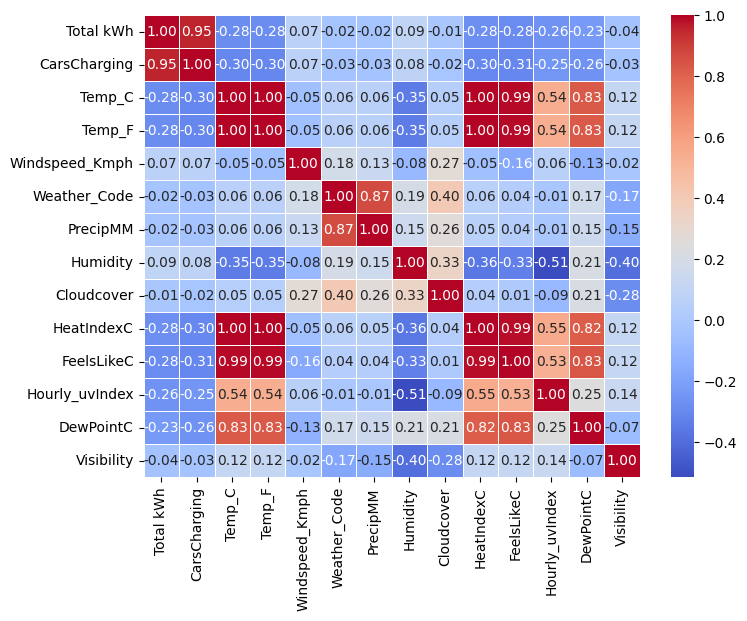

In [64]:
# Correlation Heatmap do see feature significance
correlation_matrix = df_expand.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

In [65]:
#Safe new EV + Weather dataset as a csv
df_expand.to_csv('EV_Weather.csv')

# ***Additional Exploratory Data Analysis***

## **Average energy consumption per charging session**

In [72]:
df_append['AvgEnergyperH'] = df_append['Total kWh']/df_append['DeltaChargeHours']


count    5164.000000
mean        3.147037
std         0.691071
min         0.000000
25%         3.058315
50%         3.400860
75%         3.565942
max         4.062857
Name: AvgEnergyperH, dtype: float64


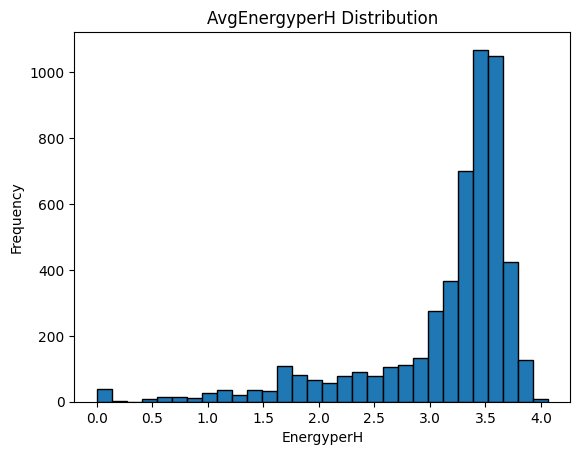

In [73]:
print(df_append['AvgEnergyperH'].describe())

plt.hist(df_append['AvgEnergyperH'], bins=30, edgecolor='black')
plt.title('AvgEnergyperH Distribution')
plt.xlabel('EnergyperH')
plt.ylabel('Frequency')
plt.show()

count    5164.000000
mean       18.181933
std        13.533293
min         0.000000
25%         8.091500
50%        13.775500
75%        24.835750
max        77.636000
Name: Total kWh, dtype: float64


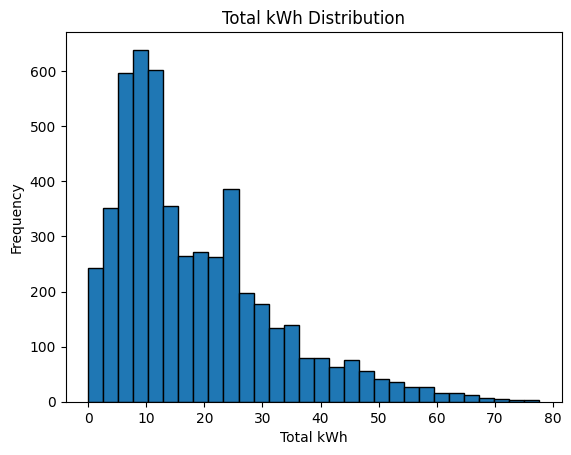

In [74]:
print(df_append['Total kWh'].describe())

plt.hist(df_append['Total kWh'], bins=30, edgecolor='black')
plt.title('Total kWh Distribution')
plt.xlabel('Total kWh')
plt.ylabel('Frequency')
plt.show()

In [75]:
df_append[(df_append['Total kWh']>50) & (df_append['UnplugChargEndHours']> 0.08333)]


,index,Chargepoint,PlugInDate,UnplugDate,ChargeStart,ChargeEnd,Total kWh,PlugChargeStartMin,DeltaChargeHours,UnplugChargeEnd,UnplugChargEndHours,UnplugDelta,UnplugDeltaHours,ChargeStartHours,ChargeEndHours,AvgEnergyperH
33,34,6184.0,2021-04-03 19:40:00,2021-04-04 15:35:00,2021-04-03 19:40:00,2021-04-04 14:53:00,66.551,0.0,19.216667,0 days 00:42:00,0.700000,0 days 00:42:00,0.700000,2021-04-03 19:00:00,2021-04-04 14:00:00,3.463192
46,47,6139.0,2021-04-05 14:19:00,2021-04-06 07:27:00,2021-04-05 14:19:00,2021-04-06 05:30:00,53.405,0.0,15.183333,0 days 01:57:00,1.950000,0 days 01:57:00,1.950000,2021-04-05 14:00:00,2021-04-06 05:00:00,3.517344
190,204,6116.0,2021-04-24 09:11:00,2021-04-25 07:21:00,2021-04-24 09:11:00,2021-04-25 03:07:00,64.654,0.0,17.933333,0 days 04:14:00,4.233333,0 days 04:14:00,4.233333,2021-04-24 09:00:00,2021-04-25 03:00:00,3.605242
192,206,6184.0,2021-04-24 11:57:00,2021-04-25 09:56:00,2021-04-24 11:57:00,2021-04-25 06:53:00,64.809,0.0,18.933333,0 days 03:03:00,3.050000,0 days 03:03:00,3.050000,2021-04-24 11:00:00,2021-04-25 06:00:00,3.423011
193,207,6184.0,2021-04-24 11:57:00,2021-04-25 09:56:00,2021-04-24 11:57:00,2021-04-25 06:53:00,64.809,0.0,18.933333,0 days 03:03:00,3.050000,0 days 03:03:00,3.050000,2021-04-24 11:00:00,2021-04-25 06:00:00,3.423011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,5261,6138.0,2022-03-23 21:15:00,2022-03-24 16:51:00,2022-03-23 21:15:00,2022-03-24 12:17:00,52.394,0.0,15.033333,0 days 04:34:00,4.566667,0 days 04:34:00,4.566667,2022-03-23 21:00:00,2022-03-24 12:00:00,3.485188
5071,5341,6118.0,2022-03-27 13:30:00,2022-03-28 09:46:00,2022-03-27 13:30:00,2022-03-28 09:13:00,71.564,0.0,19.716667,0 days 00:33:00,0.550000,0 days 00:33:00,0.550000,2022-03-27 13:00:00,2022-03-28 09:00:00,3.629620
5100,5371,6118.0,2022-03-28 12:30:00,2022-03-29 09:33:00,2022-03-28 12:30:00,2022-03-29 06:07:00,62.479,0.0,17.616667,0 days 03:26:00,3.433333,0 days 03:26:00,3.433333,2022-03-28 12:00:00,2022-03-29 06:00:00,3.546585
5124,5395,6144.0,2022-03-29 14:49:00,2022-03-30 12:15:00,2022-03-29 14:49:00,2022-03-30 06:22:00,54.908,0.0,15.550000,0 days 05:53:00,5.883333,0 days 05:53:00,5.883333,2022-03-29 14:00:00,2022-03-30 06:00:00,3.531061


2470 2694


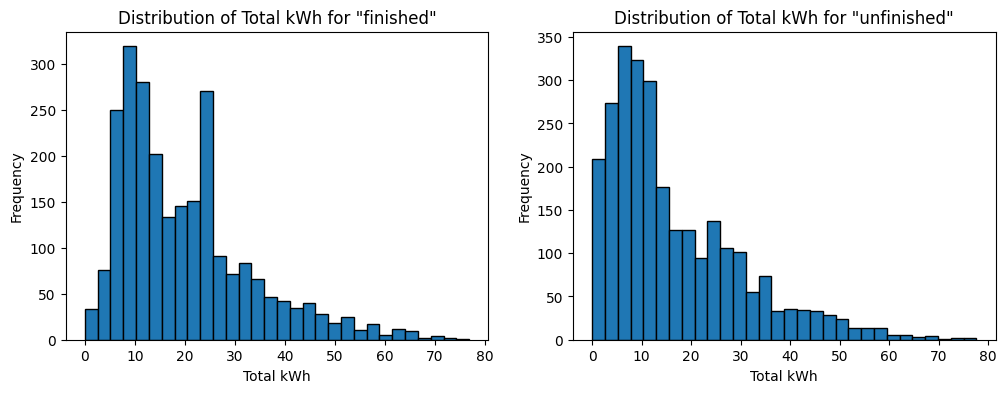

In [76]:
#Assuming that EVs that stop charging atleast 5 minutes before the unplug time are 'finished'
#That is, they are at 100% battery capacity, while those 'unfinished' are not

finished = df_append[df_append['UnplugChargEndHours']>0.0833]
unfinished = df_append[df_append['UnplugChargEndHours']<0.0833]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(finished['Total kWh'], bins=30, edgecolor='black')
axes[0].set_title('Distribution of Total kWh for "finished"')
axes[0].set_xlabel('Total kWh')
axes[0].set_ylabel('Frequency')

axes[1].hist(unfinished['Total kWh'], bins=30, edgecolor='black')
axes[1].set_title('Distribution of Total kWh for "unfinished"')
axes[1].set_xlabel('Total kWh')
axes[1].set_ylabel('Frequency')

print(len(finished), len(unfinished))

In [77]:
# Comparing means of both categories
print(finished['Total kWh'].mean(), unfinished['Total kWh'].mean())

19.93378906882591 16.575739420935413


## **Month feature + plot**

In [78]:
chargepoints = list(df_append['Chargepoint'].unique())
for i in chargepoints:
  print(i, 'first charged at', df_append[df_append['Chargepoint'] == i]['ChargeStart'].min(), 'for a total of', len(df_append[df_append['Chargepoint'] == i]))

6189.0 first charged at 2021-03-31 14:30:00 for a total of 367
6104.0 first charged at 2021-03-31 18:14:00 for a total of 25
6169.0 first charged at 2021-04-01 07:49:00 for a total of 61
6188.0 first charged at 2021-04-01 10:32:00 for a total of 37
6118.0 first charged at 2021-04-01 16:08:00 for a total of 338
6101.0 first charged at 2021-04-01 16:57:00 for a total of 61
6109.0 first charged at 2021-04-01 21:39:00 for a total of 106
6123.0 first charged at 2021-04-02 09:34:00 for a total of 134
6187.0 first charged at 2021-04-02 10:34:00 for a total of 7
6155.0 first charged at 2021-04-02 13:01:00 for a total of 104
6168.0 first charged at 2021-04-02 08:23:00 for a total of 110
6127.0 first charged at 2021-04-02 19:00:00 for a total of 85
6136.0 first charged at 2021-04-03 09:23:00 for a total of 196
6115.0 first charged at 2021-04-03 16:12:00 for a total of 85
6110.0 first charged at 2021-04-04 09:27:00 for a total of 6
6132.0 first charged at 2021-04-03 10:44:00 for a total of 209
61

In [79]:
df_append['Month'] = df_append['ChargeStart'].dt.to_period('M')
monthly_aggregated_charging_instances = df_append.groupby('Month')['Chargepoint'].count()
monthly_aggregated_demand = df_append.groupby('Month')['Total kWh'].sum()

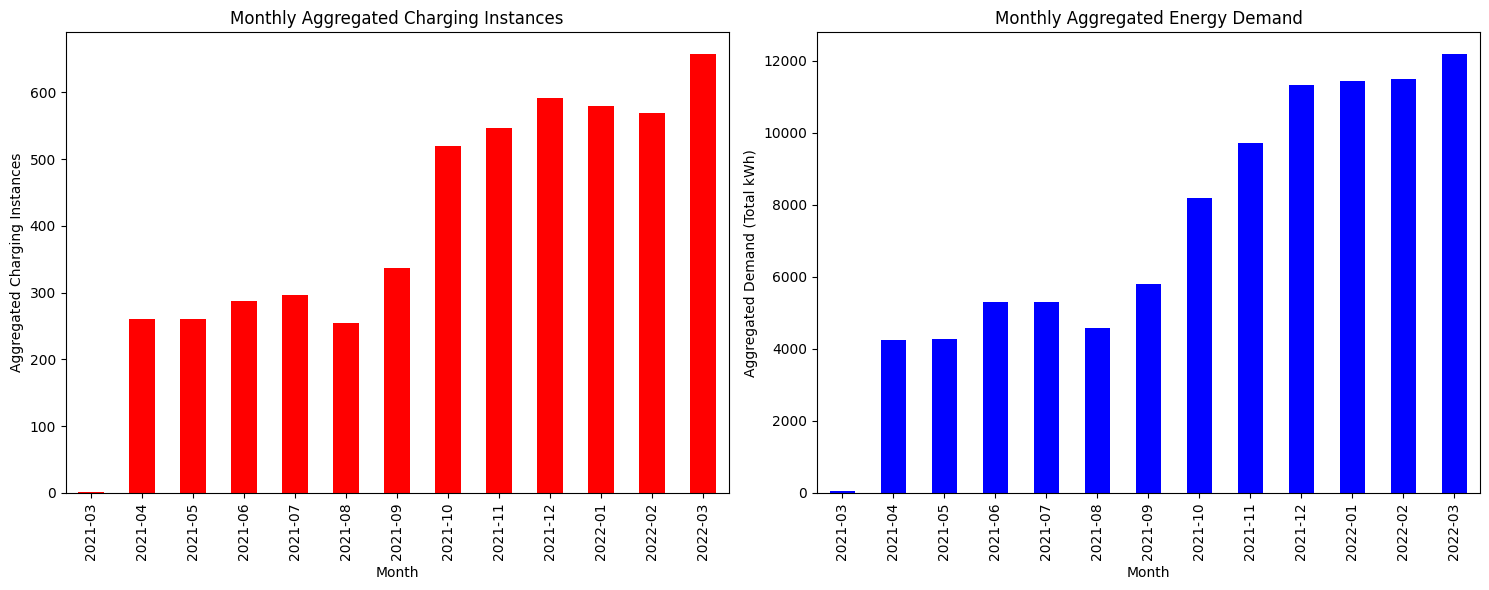

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

monthly_aggregated_charging_instances.plot(kind='bar', x='Month', y='Aggregated Charging Instances', color='red', ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Aggregated Charging Instances')
axes[0].set_title('Monthly Aggregated Charging Instances')

# Plot the second graph (you need to have your second DataFrame or plot logic here)
# Example using the same data for illustration purposes
monthly_aggregated_demand.plot(kind='bar', x='Month', y='Aggregated_Demand', color='blue', ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Aggregated Demand (Total kWh)')
axes[1].set_title('Monthly Aggregated Energy Demand')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

**This suggest that the change in energy consumption over time is not due to different charging behavior. Instead, it is simply due to more people deciding to use the public chargers. The reason for that could be the COVID19 lockdowns, which were partially still in place at the beginning of 2021.**

#### **Proximity to peak hours**

## **Hourly feature + plot**

Considering the charging intances distribution by every hour of the day

In [83]:
df_append['HourStart'] = df_append['ChargeStart'].dt.hour
df_append['HourEnd'] = df_append['ChargeEnd'].dt.hour
hourly_aggregated_demand = df_append.groupby('HourStart')['Total kWh'].sum()


Text(0, 0.5, 'Frequency')

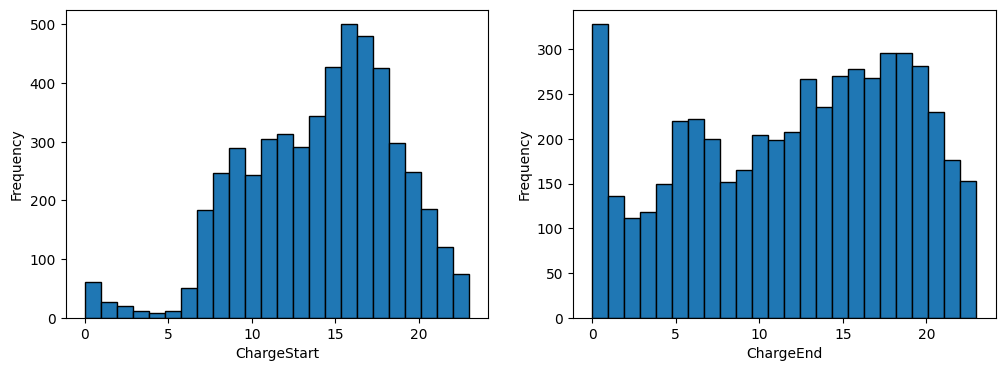

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df_append['HourStart'], bins=24, edgecolor='black')
axes[0].set_xlabel('ChargeStart')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_append['HourEnd'], bins=24, edgecolor='black')
axes[1].set_xlabel('ChargeEnd')
axes[1].set_ylabel('Frequency')

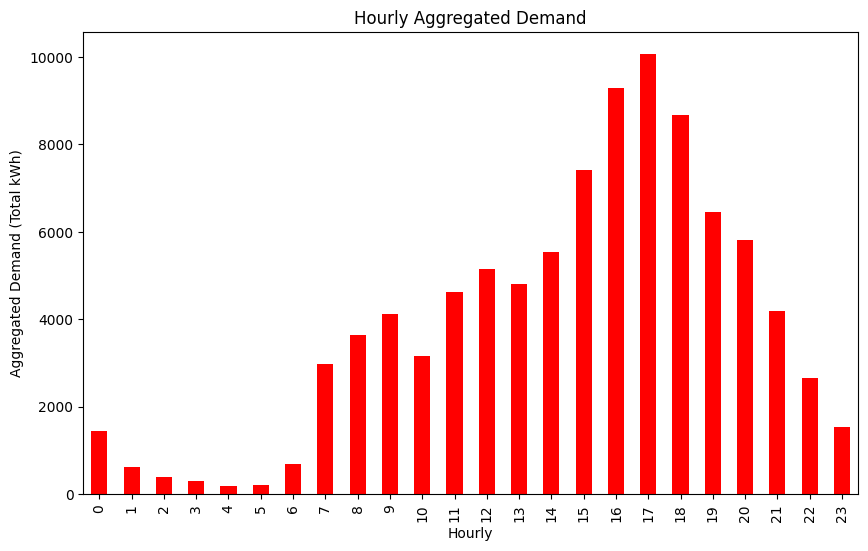

In [85]:
plt.figure(figsize=(10, 6))
hourly_aggregated_demand.plot(kind='bar', color='red')
plt.xlabel('Hourly')
plt.ylabel('Aggregated Demand (Total kWh)')
plt.title('Hourly Aggregated Demand')
plt.show()

## **Weekly feature + plot**

In [88]:
df_append['Weekday'] = df_append['PlugInDate'].dt.weekday
weekday_aggregated_demand = df_append.groupby('Weekday')['Total kWh'].sum()

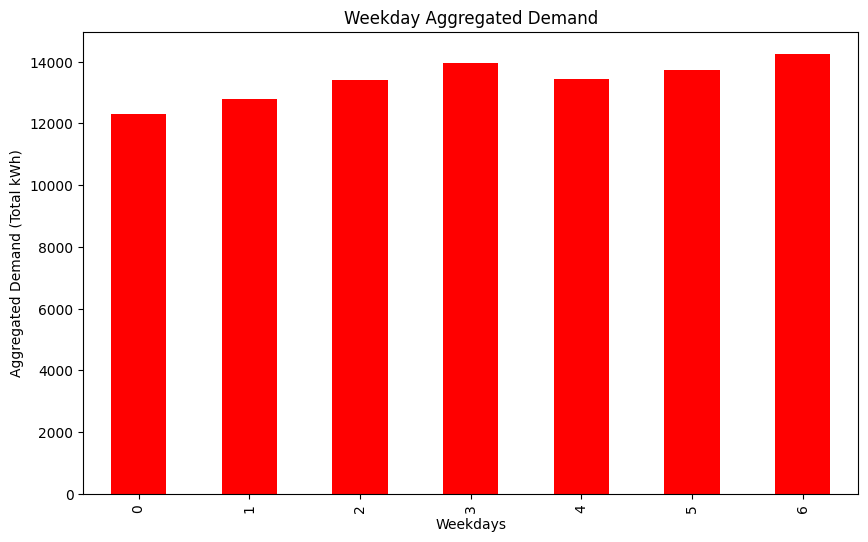

In [89]:
plt.figure(figsize=(10, 6))
weekday_aggregated_demand.plot(kind='bar', color='red')
plt.xlabel('Weekdays')
plt.ylabel('Aggregated Demand (Total kWh)')
plt.title('Weekday Aggregated Demand')
plt.show()

Conclusion: No significant difference in energy consumption between the week days